In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

C:\Users\Maverick\AppData\Local\Temp\ipykernel_20164\1268343026.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the Iris dataset
df = sns.load_dataset('iris')

In [3]:
# Inspect the data
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [15]:
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [16]:
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [17]:
# Check for null values
print("\nChecking for null values in the dataset:")
print(df.isnull().sum())


Checking for null values in the dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


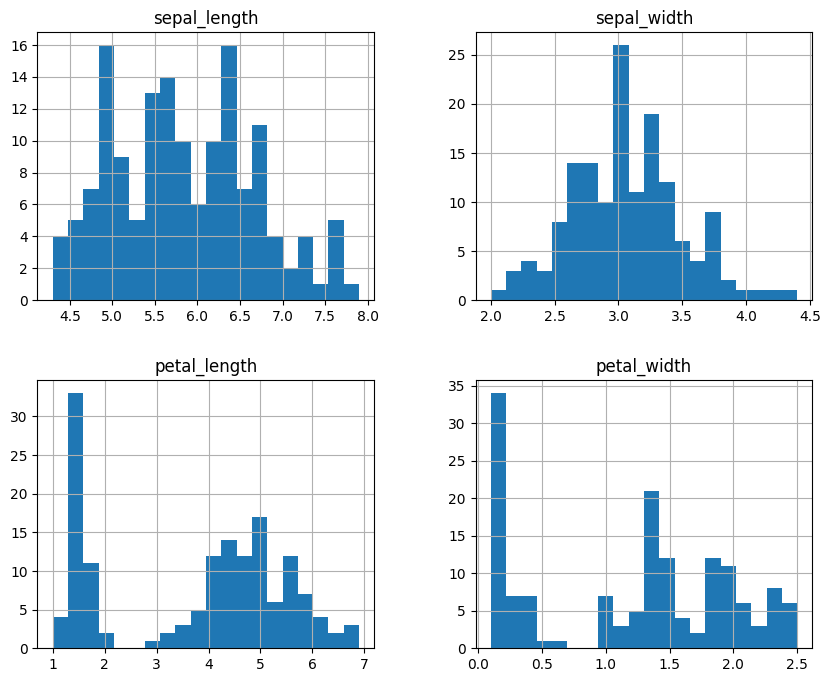

In [18]:
# Visualize feature distributions
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[features].hist(bins=20, figsize=(10, 8))
plt.show()

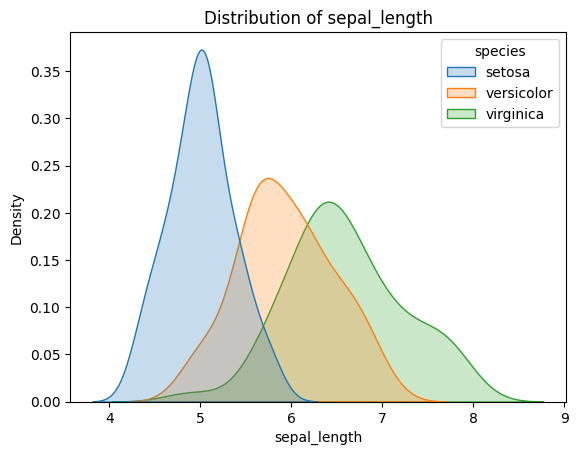

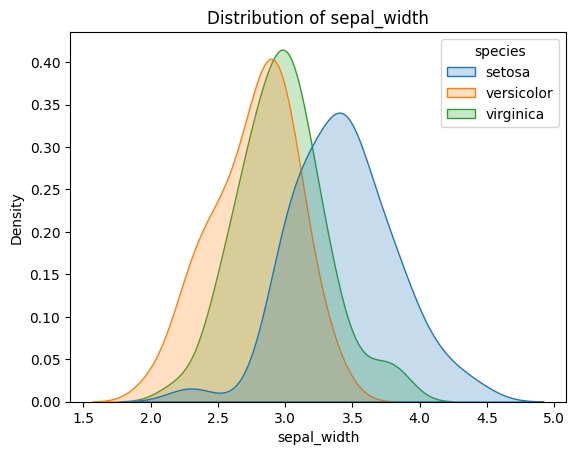

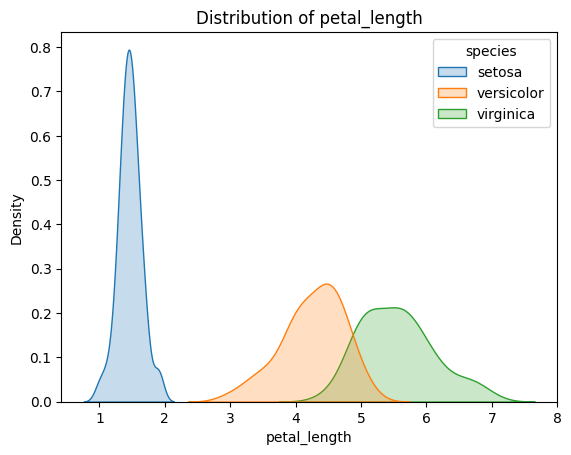

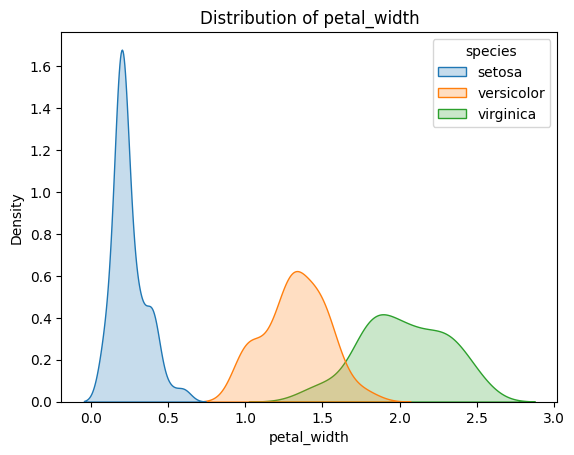

In [19]:
# KDE plots
for feature in features:
    sns.kdeplot(data=df, x=feature, hue='species', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

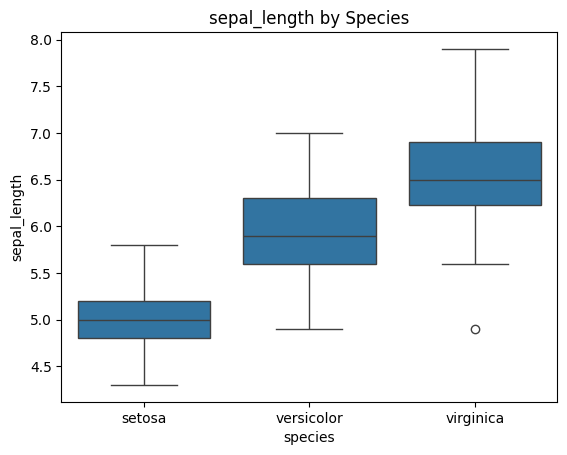

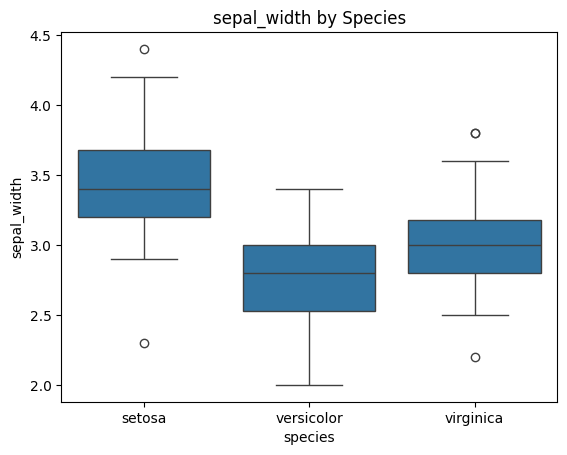

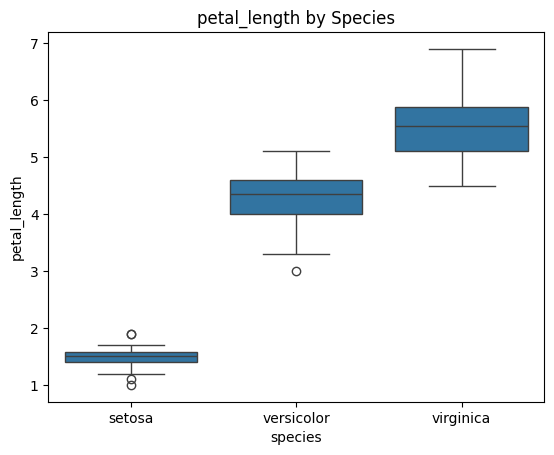

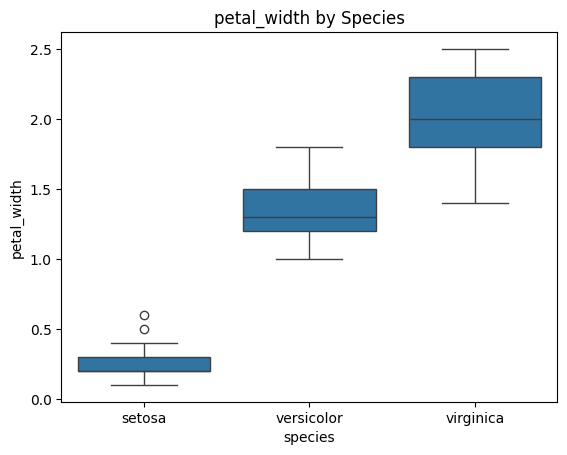

In [7]:
# Box plots
for feature in features:
    sns.boxplot(data=df, x='species', y=feature)
    plt.title(f'{feature} by Species')
    plt.show()

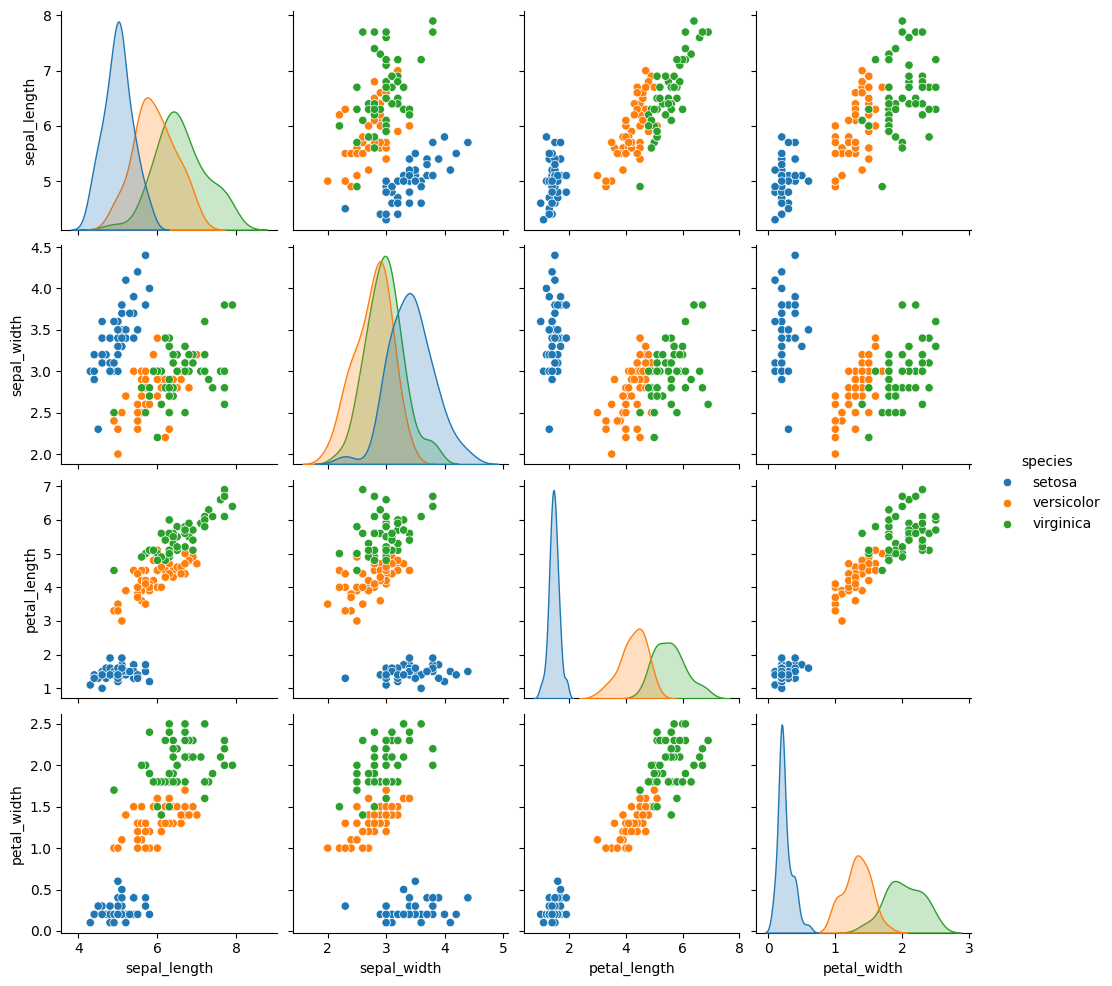

In [8]:
# Pair plots
sns.pairplot(df, hue='species')
plt.show()

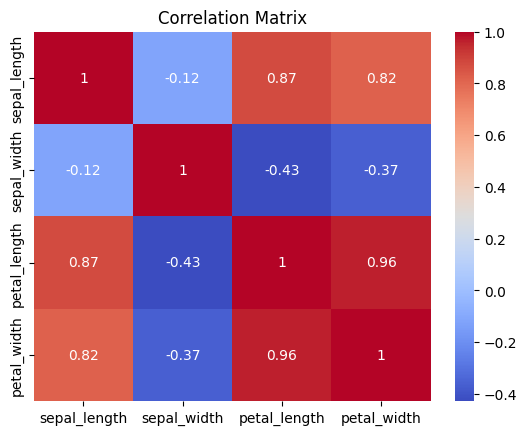

In [9]:
# Correlation matrix
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

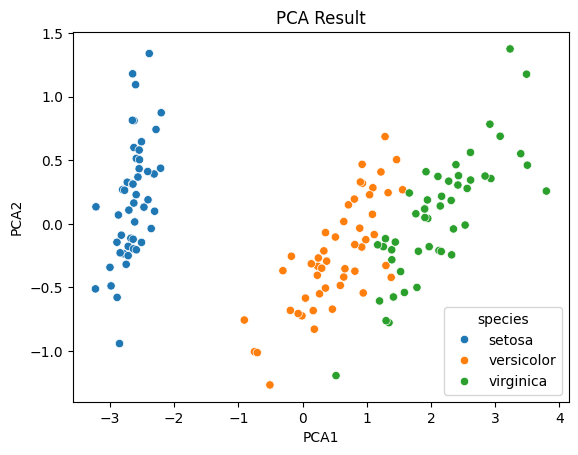

In [10]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='species')
plt.title('PCA Result')
plt.show()

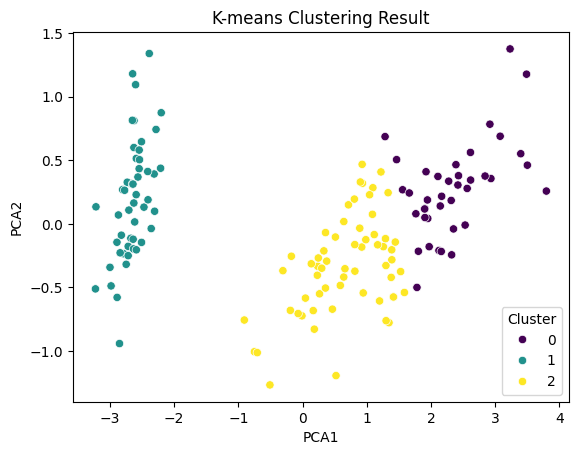

In [11]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('K-means Clustering Result')
plt.show()